In [1]:
# Import dependecies 
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
import scipy as sp
import matplotlib.pyplot as plt
import os

In [2]:
# Read dataset and preview
data_df = pd.read_csv("Resources/DataScience_salaries_2024.csv")
data_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


In [3]:
# Manipulate data to sort in ascending order by work_year, reset index and rename columns
year_sort_df = data_df.sort_values('work_year')
year_sort_df.reset_index(drop = True)
cleaned_data = year_sort_df[['work_year', 'experience_level', 'employment_type','job_title', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']]
cleaned_renamed = cleaned_data.rename(columns = {"work_year":"Working Year", "experience_level":"Experience Level",
                                    "employment_type":"Employment Type", "job_title":"Job Title",
                                    "salary_in_usd":"Salary (USD)", "employee_residence":"Employee Residence (Country)",
                                    "remote_ratio":"Remote Work Ratio", "company_location":"Location of Company (Country)",
                                   "company_size":"Size of Company"})
cleaned_renamed.reset_index(drop = True)

,Working Year,Experience Level,Employment Type,Job Title,Salary (USD),Employee Residence (Country),Remote Work Ratio,Location of Company (Country),Size of Company
0,2020,EN,PT,ML Engineer,15966,DE,100,DE,S
1,2020,MI,FT,Business Data Analyst,95000,US,0,US,M
2,2020,EN,FT,Data Analyst,91000,US,100,US,L
3,2020,MI,FT,Data Engineer,112872,GB,50,GB,L
4,2020,EX,FT,Managing Director Data Science,300000,US,100,US,L
...,...,...,...,...,...,...,...,...,...
14833,2024,MI,FT,Machine Learning Engineer,210100,US,0,US,M
14834,2024,MI,FT,Machine Learning Engineer,210100,US,0,US,M
14835,2024,MI,FT,Machine Learning Engineer,210100,US,0,US,M
14836,2024,MI,FT,Data Engineer,210100,US,0,US,M


In [4]:
# Determine the number of counts per Job Title to select the top 3 with the most number of counts
counts_job_titles = cleaned_renamed["Job Title"].value_counts()

In [5]:
# Print the counts per Job Title
counts_job_titles

Job Title
Data Engineer                3162
Data Scientist               3015
Data Analyst                 2189
Machine Learning Engineer    1542
Research Scientist            475
                             ... 
Marketing Data Engineer         1
Manager Data Management         1
Data Science Tech Lead          1
Principal Data Architect        1
Big Data Developer              1
Name: count, Length: 153, dtype: int64

In [6]:
# Determine the number of counts per Country to select the top country with the most number of counts
counts_countries = cleaned_renamed["Location of Company (Country)"].value_counts()

In [7]:
# Print the counts per country
counts_countries

Location of Company (Country)
US    12975
GB      655
CA      392
ES      127
DE       98
      ...  
OM        1
IR        1
MU        1
HN        1
CN        1
Name: count, Length: 77, dtype: int64

In [8]:
# Make the Job Title column the index name and keep "Job Title" column for easy parsing data
cleaned_renamed = cleaned_renamed.set_index("Job Title", drop = False)
cleaned_renamed.head()

,Working Year,Experience Level,Employment Type,Job Title,Salary (USD),Employee Residence (Country),Remote Work Ratio,Location of Company (Country),Size of Company
Job Title,,,,,,,,,
ML Engineer,2020,EN,PT,ML Engineer,15966,DE,100,DE,S
Business Data Analyst,2020,MI,FT,Business Data Analyst,95000,US,0,US,M
Data Analyst,2020,EN,FT,Data Analyst,91000,US,100,US,L
Data Engineer,2020,MI,FT,Data Engineer,112872,GB,50,GB,L
Managing Director Data Science,2020,EX,FT,Managing Director Data Science,300000,US,100,US,L


In [9]:
# Results from above showed that the US is the country with the highest number of jobs, with Data Engineer, Data Scientist and Data Analyst being the jobs with the highest counts
# Subset dataset to US, entry level and top 3 Job Titles with the highest counts
subset_usa_entry = cleaned_renamed[(cleaned_renamed["Experience Level"] == "EN") & (cleaned_renamed["Location of Company (Country)"] == "US")]
subset_usa_entry = subset_usa_entry.loc[["Data Engineer","Data Scientist", "Data Analyst"], :]

In [10]:
# Preview subset dataset
subset_usa_entry.head()

,Working Year,Experience Level,Employment Type,Job Title,Salary (USD),Employee Residence (Country),Remote Work Ratio,Location of Company (Country),Size of Company
Job Title,,,,,,,,,
Data Engineer,2021,EN,FT,Data Engineer,72500,US,100,US,L
Data Engineer,2021,EN,FT,Data Engineer,80000,US,100,US,L
Data Engineer,2022,EN,FT,Data Engineer,120000,US,100,US,M
Data Engineer,2022,EN,FT,Data Engineer,80000,US,100,US,L
Data Engineer,2022,EN,FT,Data Engineer,129000,US,100,US,L


In [ ]:
# Create directory
os.makedirs("plots")

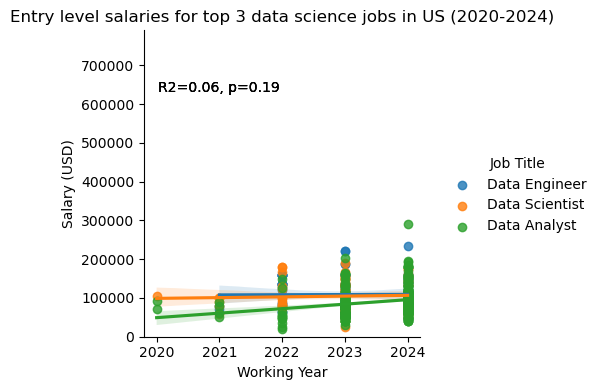

In [30]:
# Perform linear regression model. Function to annotate r2 and p values was modified from https://stackoverflow.com/questions/25579227/seaborn-lmplot-with-equation-and-r2-text
lmplot_entry = sns.lmplot(x = "Working Year", y = "Salary (USD)",
           hue = "Job Title", data = subset_usa_entry, height = 4 , aspect = 1)
lmplot_entry.set(ylim=(0, 790000))

# Add title
ax = plt.gca()
ax.set_title("Entry level salaries for top 3 data science jobs in US (2020-2024)")

# Determine R2 and p-values
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(subset_usa_entry["Working Year"], subset_usa_entry["Salary (USD)"])
    ax = plt.gca()
    ax.text(.05, .8, "R2={:.2f}, p={:.2g}".format(r, p),
            transform = ax.transAxes)
    
# Annotate R2 and p-values
lmplot_entry.map_dataframe(annotate)

# Save image
lmplot_entry.savefig("plots/lmplot_entry.png", dpi = 400) 

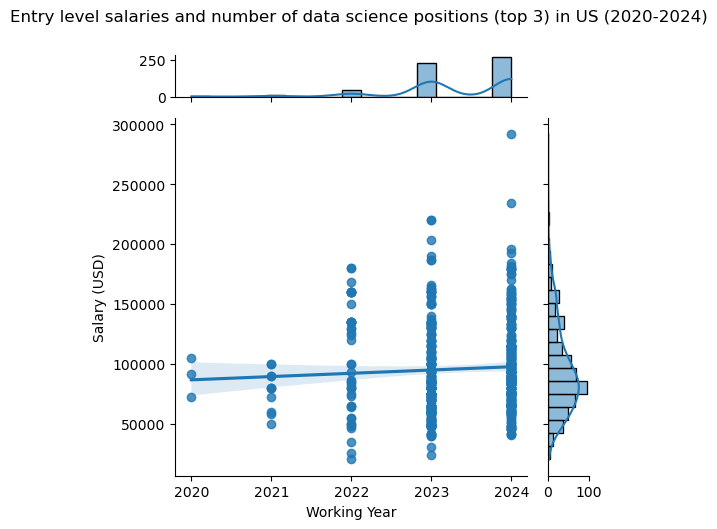

In [48]:
# Create a joint plot for entry level positions in the US
joint_plot_entry = sns.jointplot(x = "Working Year", y = "Salary (USD)", data = subset_usa_entry, kind = "reg", height = 5, ratio = 6, marginal_ticks=True, space = 0.5)
plt.suptitle("Entry level salaries and number of data science positions (top 3) in US (2020-2024)", y = 1.05)
joint_plot_entry.savefig("plots/jointplot_entry.png", dpi = 400) 

In [13]:
# Subset dataset to US, middle level and top 3 Job Titles with the highest counts
subset_usa_middle = cleaned_renamed[(cleaned_renamed["Experience Level"] == "MI") & (cleaned_renamed["Location of Company (Country)"] == "US")]
subset_usa_middle = subset_usa_middle.loc[["Data Engineer","Data Scientist", "Data Analyst"], :]

In [14]:
# Preview subset dataset
subset_usa_middle.head()

,Working Year,Experience Level,Employment Type,Job Title,Salary (USD),Employee Residence (Country),Remote Work Ratio,Location of Company (Country),Size of Company
Job Title,,,,,,,,,
Data Engineer,2020,MI,FT,Data Engineer,130800,ES,100,US,M
Data Engineer,2020,MI,FT,Data Engineer,110000,US,100,US,L
Data Engineer,2020,MI,FT,Data Engineer,106000,US,100,US,L
Data Engineer,2021,MI,FT,Data Engineer,140000,US,100,US,L
Data Engineer,2021,MI,FT,Data Engineer,111775,US,0,US,M


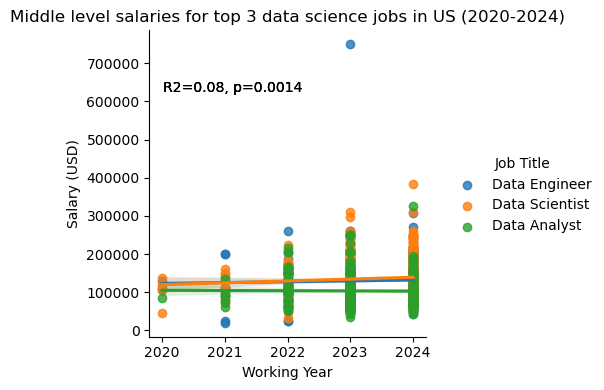

In [31]:
# Perform linear regression model
lmplot_middle = sns.lmplot(x = "Working Year", y = "Salary (USD)",
           hue = "Job Title", data = subset_usa_middle, height = 4, aspect = 1)

# Add title
ax = plt.gca()
ax.set_title("Middle level salaries for top 3 data science jobs in US (2020-2024)")

# Determine R2 and p-values
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(subset_usa_middle["Working Year"], subset_usa_middle["Salary (USD)"])
    ax = plt.gca()
    ax.text(.05, .8, "R2={:.2f}, p={:.2g}".format(r, p),
            transform = ax.transAxes)

# Annotate R2 and p-values
lmplot_middle.map_dataframe(annotate)

# Save image
lmplot_middle.savefig("plots/lmplot_middle.png", dpi = 400) 

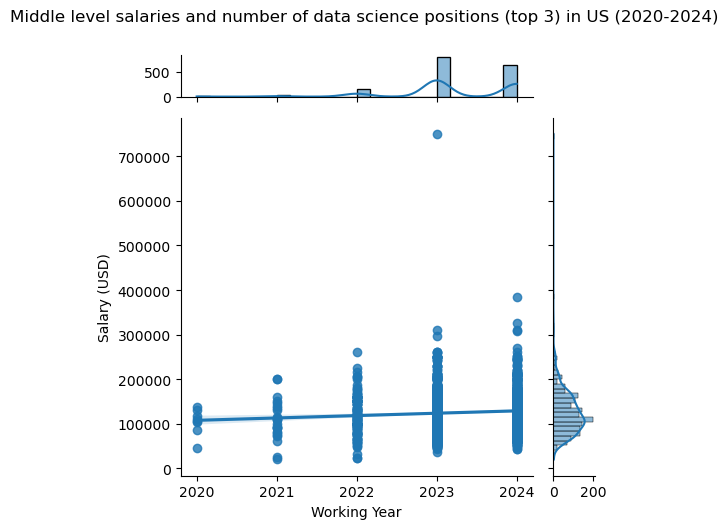

In [47]:
# Create joint plot for middle level positions in the US
joint_plot_middle = sns.jointplot(x = "Working Year", y = "Salary (USD)", data = subset_usa_middle, kind = "reg", height = 5, ratio = 6, marginal_ticks=True, space = 0.5)
plt.suptitle("Middle level salaries and number of data science positions (top 3) in US (2020-2024)", y = 1.05)
joint_plot_middle.savefig("plots/jointplot_middle.png", dpi = 400) 

In [17]:
# Subset dataset to US, senior level and top 3 Job Titles with the highest counts
subset_usa_senior = cleaned_renamed[(cleaned_renamed["Experience Level"] == "SE") & (cleaned_renamed["Location of Company (Country)"] == "US")]
subset_usa_senior = subset_usa_senior.loc[["Data Engineer","Data Scientist", "Data Analyst"], :]

In [18]:
# Preview subset dataset
subset_usa_senior.head()

,Working Year,Experience Level,Employment Type,Job Title,Salary (USD),Employee Residence (Country),Remote Work Ratio,Location of Company (Country),Size of Company
Job Title,,,,,,,,,
Data Engineer,2020,SE,FT,Data Engineer,188000,US,100,US,L
Data Engineer,2021,SE,FT,Data Engineer,150000,US,100,US,L
Data Engineer,2021,SE,FT,Data Engineer,150000,US,100,US,M
Data Engineer,2021,SE,FT,Data Engineer,150000,US,0,US,L
Data Engineer,2021,SE,FT,Data Engineer,153000,US,100,US,L


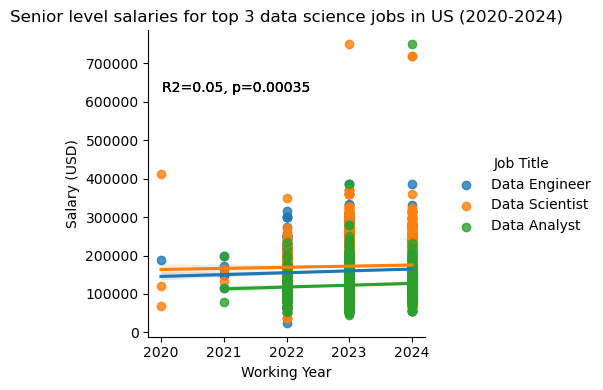

In [32]:
# Perform linear regression model
lmplot_senior = sns.lmplot(x = "Working Year", y = "Salary (USD)",
           hue = "Job Title", data = subset_usa_senior, height = 4, aspect = 1)

# Add title
ax = plt.gca()
ax.set_title("Senior level salaries for top 3 data science jobs in US (2020-2024)")

# Determine R2 and p-values
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(subset_usa_senior["Working Year"], subset_usa_senior["Salary (USD)"])
    ax = plt.gca()
    ax.text(.05, .8, "R2={:.2f}, p={:.2g}".format(r, p),
            transform = ax.transAxes)

# Annotate R2 and p-values
lmplot_senior.map_dataframe(annotate)

# Save image
lmplot_senior.savefig("plots/lmplot_senior.png", dpi = 400) 

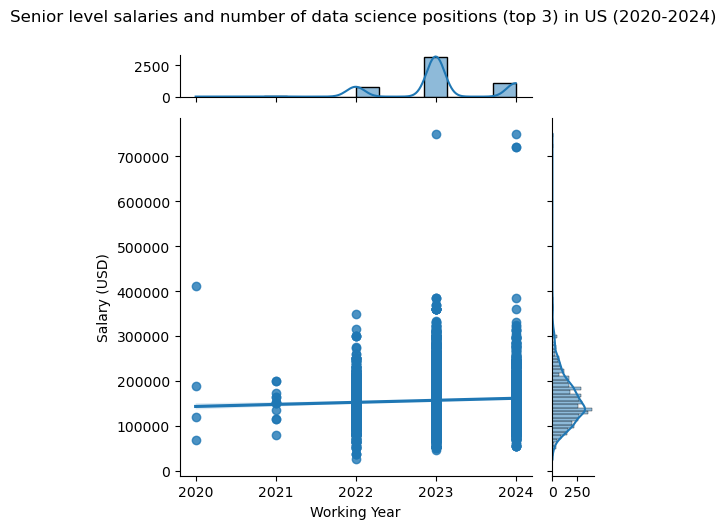

In [46]:
# Create joint plot for senior level positions in the US
joint_plot_senior = sns.jointplot(x = "Working Year", y = "Salary (USD)", data = subset_usa_senior, kind = "reg", height = 5, ratio = 6, marginal_ticks=True, space = 0.5)
plt.suptitle("Senior level salaries and number of data science positions (top 3) in US (2020-2024)", y = 1.05)
joint_plot_senior.savefig("plots/jointplot_senior.png", dpi = 400) 

In [21]:
# Subset dataset to US, executive level and top 3 Job Titles with the highest counts
subset_usa_executive = cleaned_renamed[(cleaned_renamed["Experience Level"] == "EX") & (cleaned_renamed["Location of Company (Country)"] == "US")]
subset_usa_executive = subset_usa_executive.loc[["Data Engineer","Data Scientist", "Data Analyst"], :]

In [22]:
# Preview subset dataset
subset_usa_executive.head()

,Working Year,Experience Level,Employment Type,Job Title,Salary (USD),Employee Residence (Country),Remote Work Ratio,Location of Company (Country),Size of Company
Job Title,,,,,,,,,
Data Engineer,2022,EX,FT,Data Engineer,200000,US,100,US,M
Data Engineer,2022,EX,FT,Data Engineer,200000,US,0,US,M
Data Engineer,2022,EX,FT,Data Engineer,242000,US,100,US,M
Data Engineer,2022,EX,FT,Data Engineer,239000,US,100,US,M
Data Engineer,2022,EX,FT,Data Engineer,239000,US,100,US,M


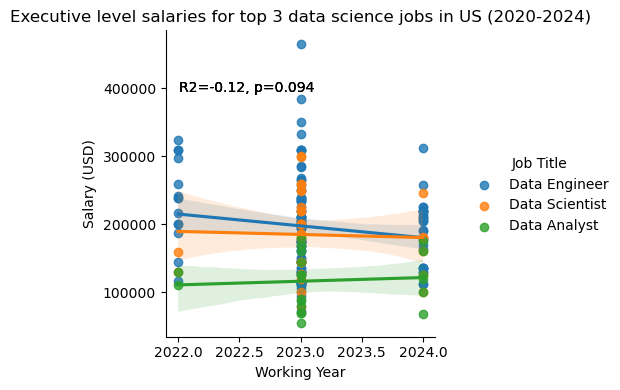

In [33]:
# Perform linear regression model
lmplot_executive = sns.lmplot(x = "Working Year", y = "Salary (USD)",
           hue = "Job Title", data = subset_usa_executive, height = 4, aspect = 1)

# Add title
ax = plt.gca()
ax.set_title("Executive level salaries for top 3 data science jobs in US (2020-2024)")

# Determine R2 and p-values
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(subset_usa_executive["Working Year"], subset_usa_executive["Salary (USD)"])
    ax = plt.gca()
    ax.text(.05, .8, "R2={:.2f}, p={:.2g}".format(r, p),
            transform = ax.transAxes)

# Annotate R2 and p-values
lmplot_executive.map_dataframe(annotate)

# Save image
lmplot_executive.savefig("plots/lmplot_executive.png", dpi = 400) 

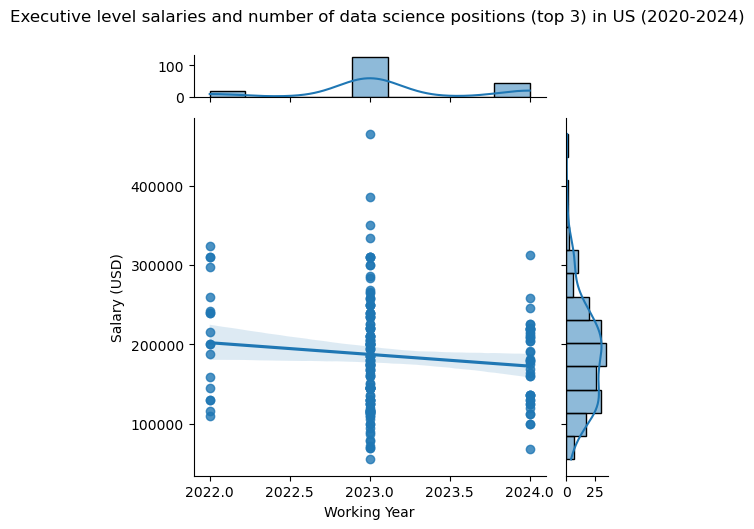

In [45]:
# Create joint plot for executive level positions in the US
joint_plot_executive = sns.jointplot(x = "Working Year", y = "Salary (USD)", data = subset_usa_executive, kind = "reg", height = 5, ratio = 6, marginal_ticks=True, space = 0.5)
plt.suptitle("Executive level salaries and number of data science positions (top 3) in US (2020-2024)", y = 1.05)
joint_plot_executive.savefig("plots/jointplot_executive.png", dpi = 400) 

In [ ]:
### END